# Using ta-lib abstract functions with mplchart

In [9]:
import pandas as pd
import yfinance as yf

import talib

from talib.abstract import Function

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks


In [10]:
functions = [Function(name).info for name in talib.get_functions()]
functions = pd.DataFrame(functions).set_index("name")
functions

,group,display_name,function_flags,input_names,parameters,output_flags,output_names
name,,,,,,,
HT_DCPERIOD,Cycle Indicators,Hilbert Transform - Dominant Cycle Period,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_DCPHASE,Cycle Indicators,Hilbert Transform - Dominant Cycle Phase,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_PHASOR,Cycle Indicators,Hilbert Transform - Phasor Components,[Function has an unstable period],{'price': 'close'},{},"{'inphase': ['Line'], 'quadrature': ['Dashed L...","[inphase, quadrature]"
HT_SINE,Cycle Indicators,Hilbert Transform - SineWave,[Function has an unstable period],{'price': 'close'},{},"{'sine': ['Line'], 'leadsine': ['Dashed Line']}","[sine, leadsine]"
HT_TRENDMODE,Cycle Indicators,Hilbert Transform - Trend vs Cycle Mode,[Function has an unstable period],{'price': 'close'},{},{'integer': ['Line']},[integer]
...,...,...,...,...,...,...,...
NATR,Volatility Indicators,Normalized Average True Range,[Function has an unstable period],"{'prices': ['high', 'low', 'close']}",{'timeperiod': 14},{'real': ['Line']},[real]
TRANGE,Volatility Indicators,True Range,None,"{'prices': ['high', 'low', 'close']}",{},{'real': ['Line']},[real]
AD,Volume Indicators,Chaikin A/D Line,None,"{'prices': ['high', 'low', 'close', 'volume']}",{},{'real': ['Line']},[real]


In [11]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2019-03-18 00:00:00-04:00,44.717373,45.340719,44.714963,45.251671,104879200,0.0,0.0
2019-03-19 00:00:00-04:00,45.331092,45.485124,44.746251,44.893063,126585600,0.0,0.0
2019-03-20 00:00:00-04:00,44.820858,45.605460,44.459846,45.285362,124140800,0.0,0.0
2019-03-21 00:00:00-04:00,45.733013,47.251670,45.682470,46.953232,204136800,0.0,0.0
2019-03-22 00:00:00-04:00,47.013397,47.578984,45.915920,45.980904,169630800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,0.0,0.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,0.0,0.0


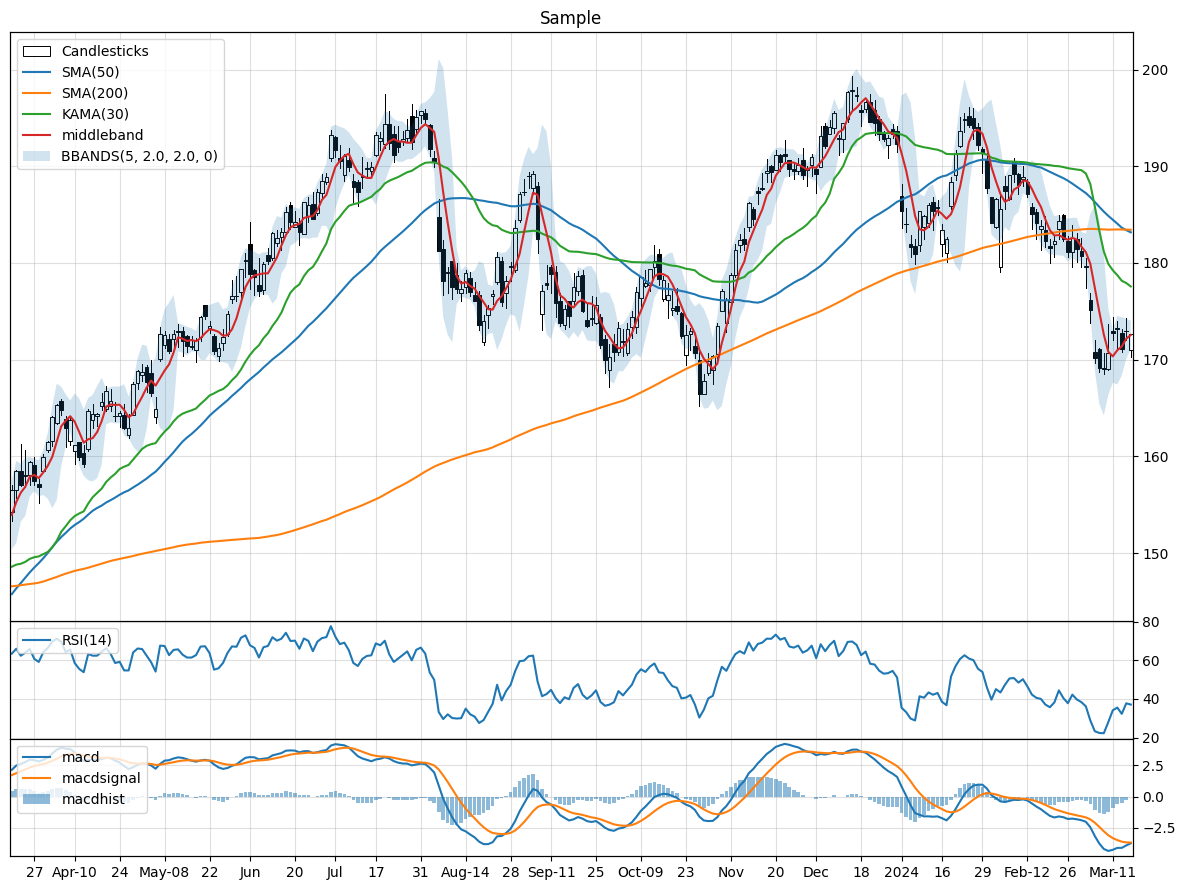

In [12]:
max_bars = 250
indicators = [
    Candlesticks(),
    Function("SMA", 50),
    Function("SMA", 200),
    Function("KAMA"),
    Function("BBANDS"),
    Function("RSI"),
    Function("MACD"),
]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)